<a href="https://colab.research.google.com/github/madhumitafilos/Collab/blob/main/Madhumita_X_IntermediateSubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ML 2023 - Predicting Wind Turbine Power output**

1.   Data Analysis
2.   Data Pre processing
3.   Linear Regression
4.   Decision Tree
5.   Random forest regressor
6.   XGBoost



# **Data Analysis**

**1.Import required libraries**

In [ ]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

#Creation of Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# to split data to training and validation dataset
from sklearn.model_selection import train_test_split

**2.Read/Extract data**

In [ ]:
wind_DS = pd.read_csv('/content/drive/MyDrive/training_data.csv')
wind_DS.head()

,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,801.22998,2013-01-01 00:00:00,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,...,5.44,16.950001,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,943.16998,2013-01-01 00:10:00,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,...,5.74,17.139999,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,998.48999,2013-01-01 00:20:00,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,...,6.09,17.150000,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,837.96002,2013-01-01 00:30:00,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,...,6.35,16.910000,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,871.57001,2013-01-01 00:40:00,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,...,6.51,16.920000,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


**Perform Descriptive Analytics / Data Exploration**

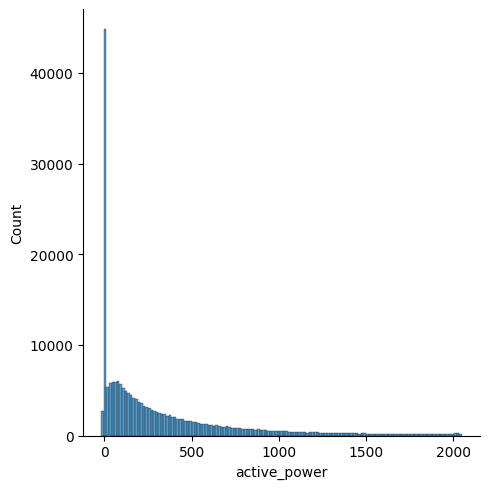

In [ ]:
sns.displot(wind_DS['active_power'])

Observation : The target active_power is normally distributed. We can see lot of data with 0 values.

Created Heatmap to analyse data

<ipython-input-4-70b1a1d11720>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wind_DS.corr(),annot=True)


Text(0.5, 1.0, 'Wind Turbine Active Power Heatmap')

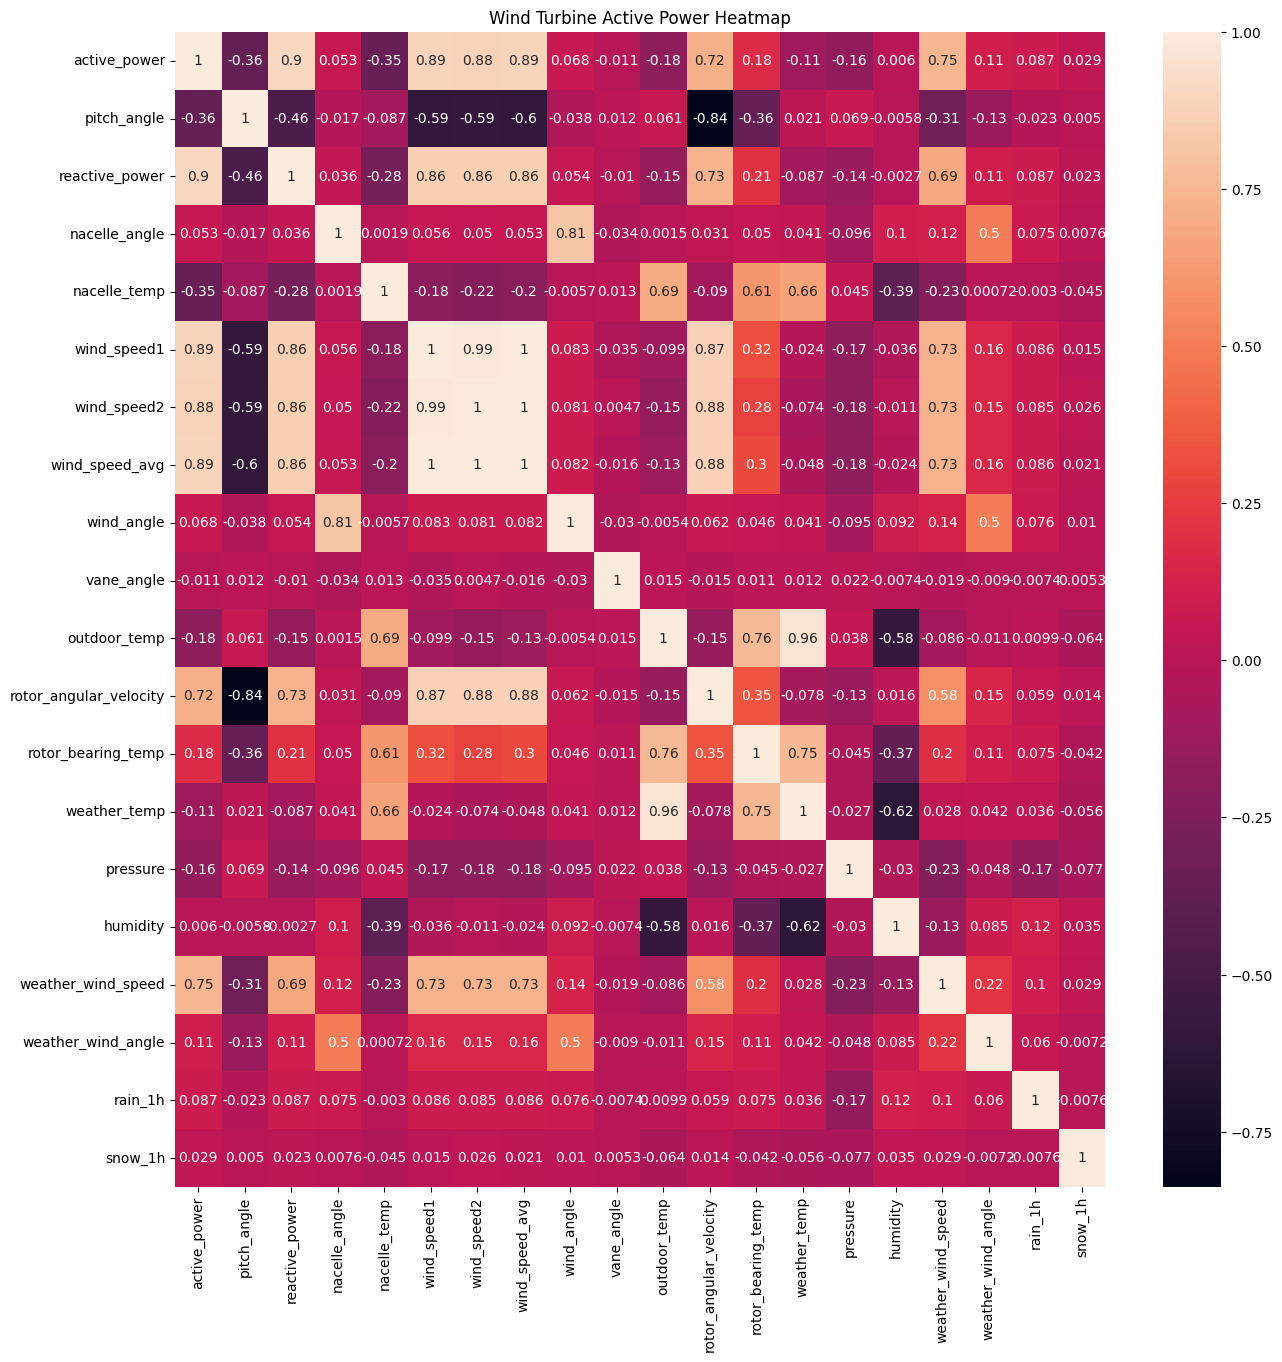

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(wind_DS.corr(),annot=True)
plt.title('Wind Turbine Active Power Heatmap')

Observation : 'pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity' showed a higher correlation on the heat map.

Outlier analysis

Text(0.5, 1.0, 'Box Plot of Active Power')

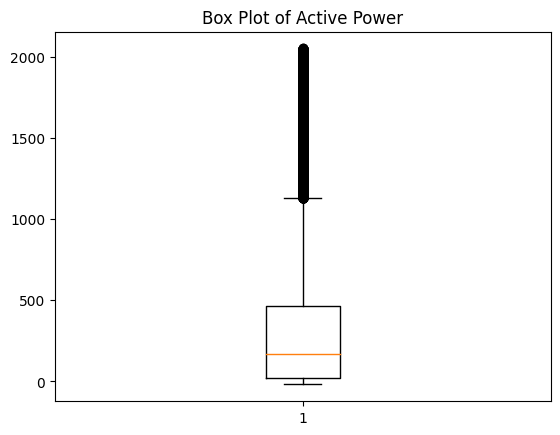

In [ ]:
# Created a box plot for seeing the distribution of active power
plt.boxplot(wind_DS['active_power'])
plt.title('Box Plot of Active Power')

Observation : The boxplot above shows a lot of outliers in the data in bold black color.

Plotted the ditribution of active power on a Histogram to view the range of the data

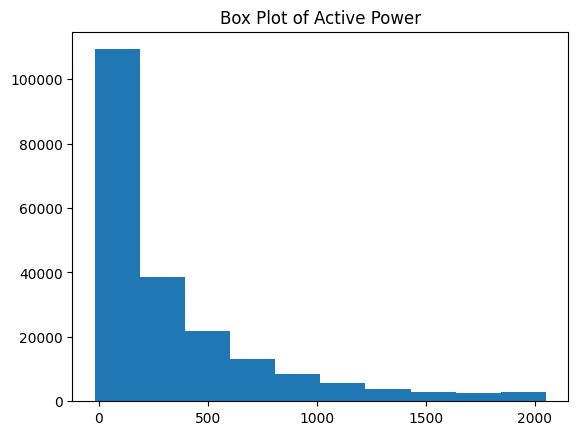

In [ ]:
plt.hist(wind_DS['active_power'])
plt.title('Box Plot of Active Power')
plt.show()

Observation: The Histogram above also has a lot of outliers in the range of 1500 to 2000.

Defined X and y targets

In [ ]:
X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
y = wind_DS['active_power']

Dividing data into training and vaidation data set

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Implementing Linear Regression**

In [ ]:
#Advanced statistics of the linear regression model
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant

# linear regression model
from sklearn.linear_model import LinearRegression

wind_lr = LinearRegression()
wind_lr.fit(train_X,train_y)
wind_lm = OLS(train_y, train_X).fit()

Actual value vs Predicted value for the training data set

In [ ]:
y_predict = wind_lm.predict(test_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_predict))
wind_lr_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_lr_dif.head()

Prediction of test set: 186813     308.408825
45433     1710.267121
64742      199.187176
151113     247.642808
24054     -225.655498
             ...     
159293      65.131129
78013      299.283361
186370    -162.182391
144587    -142.938783
182990     470.290936
Length: 62673, dtype: float64


,Actual value,Predicted value
186813,188.280000,308.408825
45433,1790.060100,1710.267121
64742,97.010002,199.187176
151113,156.500000,247.642808
24054,0.000000,-225.655498


Metrics

In [ ]:
#Metrics
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
#For more detailed summary of the model using statmodel
print(wind_lm.summary())

R squared: 90.09
Mean Absolute Error: 112.87990323892899
Mean Square Error: 21407.840676329808
Root Mean Square Error: 146.314184809026
                                 OLS Regression Results                                
Dep. Variable:           active_power   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                          3.705e+05
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:53:42   Log-Likelihood:                     -9.3692e+05
No. Observations:              146237   AIC:                                  1.874e+06
Df Residuals:                  146232   BIC:                                  1.874e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                   

Observation : We can see that the Squared error value is too high and we will need to reduce it further with an alternative approach.

Clipping method : To remove outliers - Negative result: The score decreased and the error increased.

In [ ]:
percentiles = wind_DS['active_power'].quantile([0.01,0.99]).values
wind_DS['active_power'] = np.clip(wind_DS['active_power'],percentiles[0],percentiles[1])
X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
y = wind_DS['active_power']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)
wind_lr = LinearRegression()
wind_lr.fit(train_X,train_y)
y_predict = wind_lm.predict(test_X)
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
wind_lr.score(X,y)

R squared: 89.92
Mean Absolute Error: 113.10281748847733
Mean Square Error: 21500.27916645143
Root Mean Square Error: 146.6297349327599


0.8992101013764334

**Decision Tree**

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

#To visualise Decision Regressor tree
from sklearn import tree
from matplotlib import pyplot as plt

Building Decision Tree Classifier using Regression tree

In [ ]:
wind_regression_tree = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 4)
wind_regression_tree_lr = wind_regression_tree.fit(train_X, train_y)

Measuring the test accuracy of the Decision tree

In [ ]:
y_predict = wind_regression_tree.predict(test_X)
wind_regression_tree.score(test_X, test_y)

0.9896005144074586

Visualise Decision Regressor tree

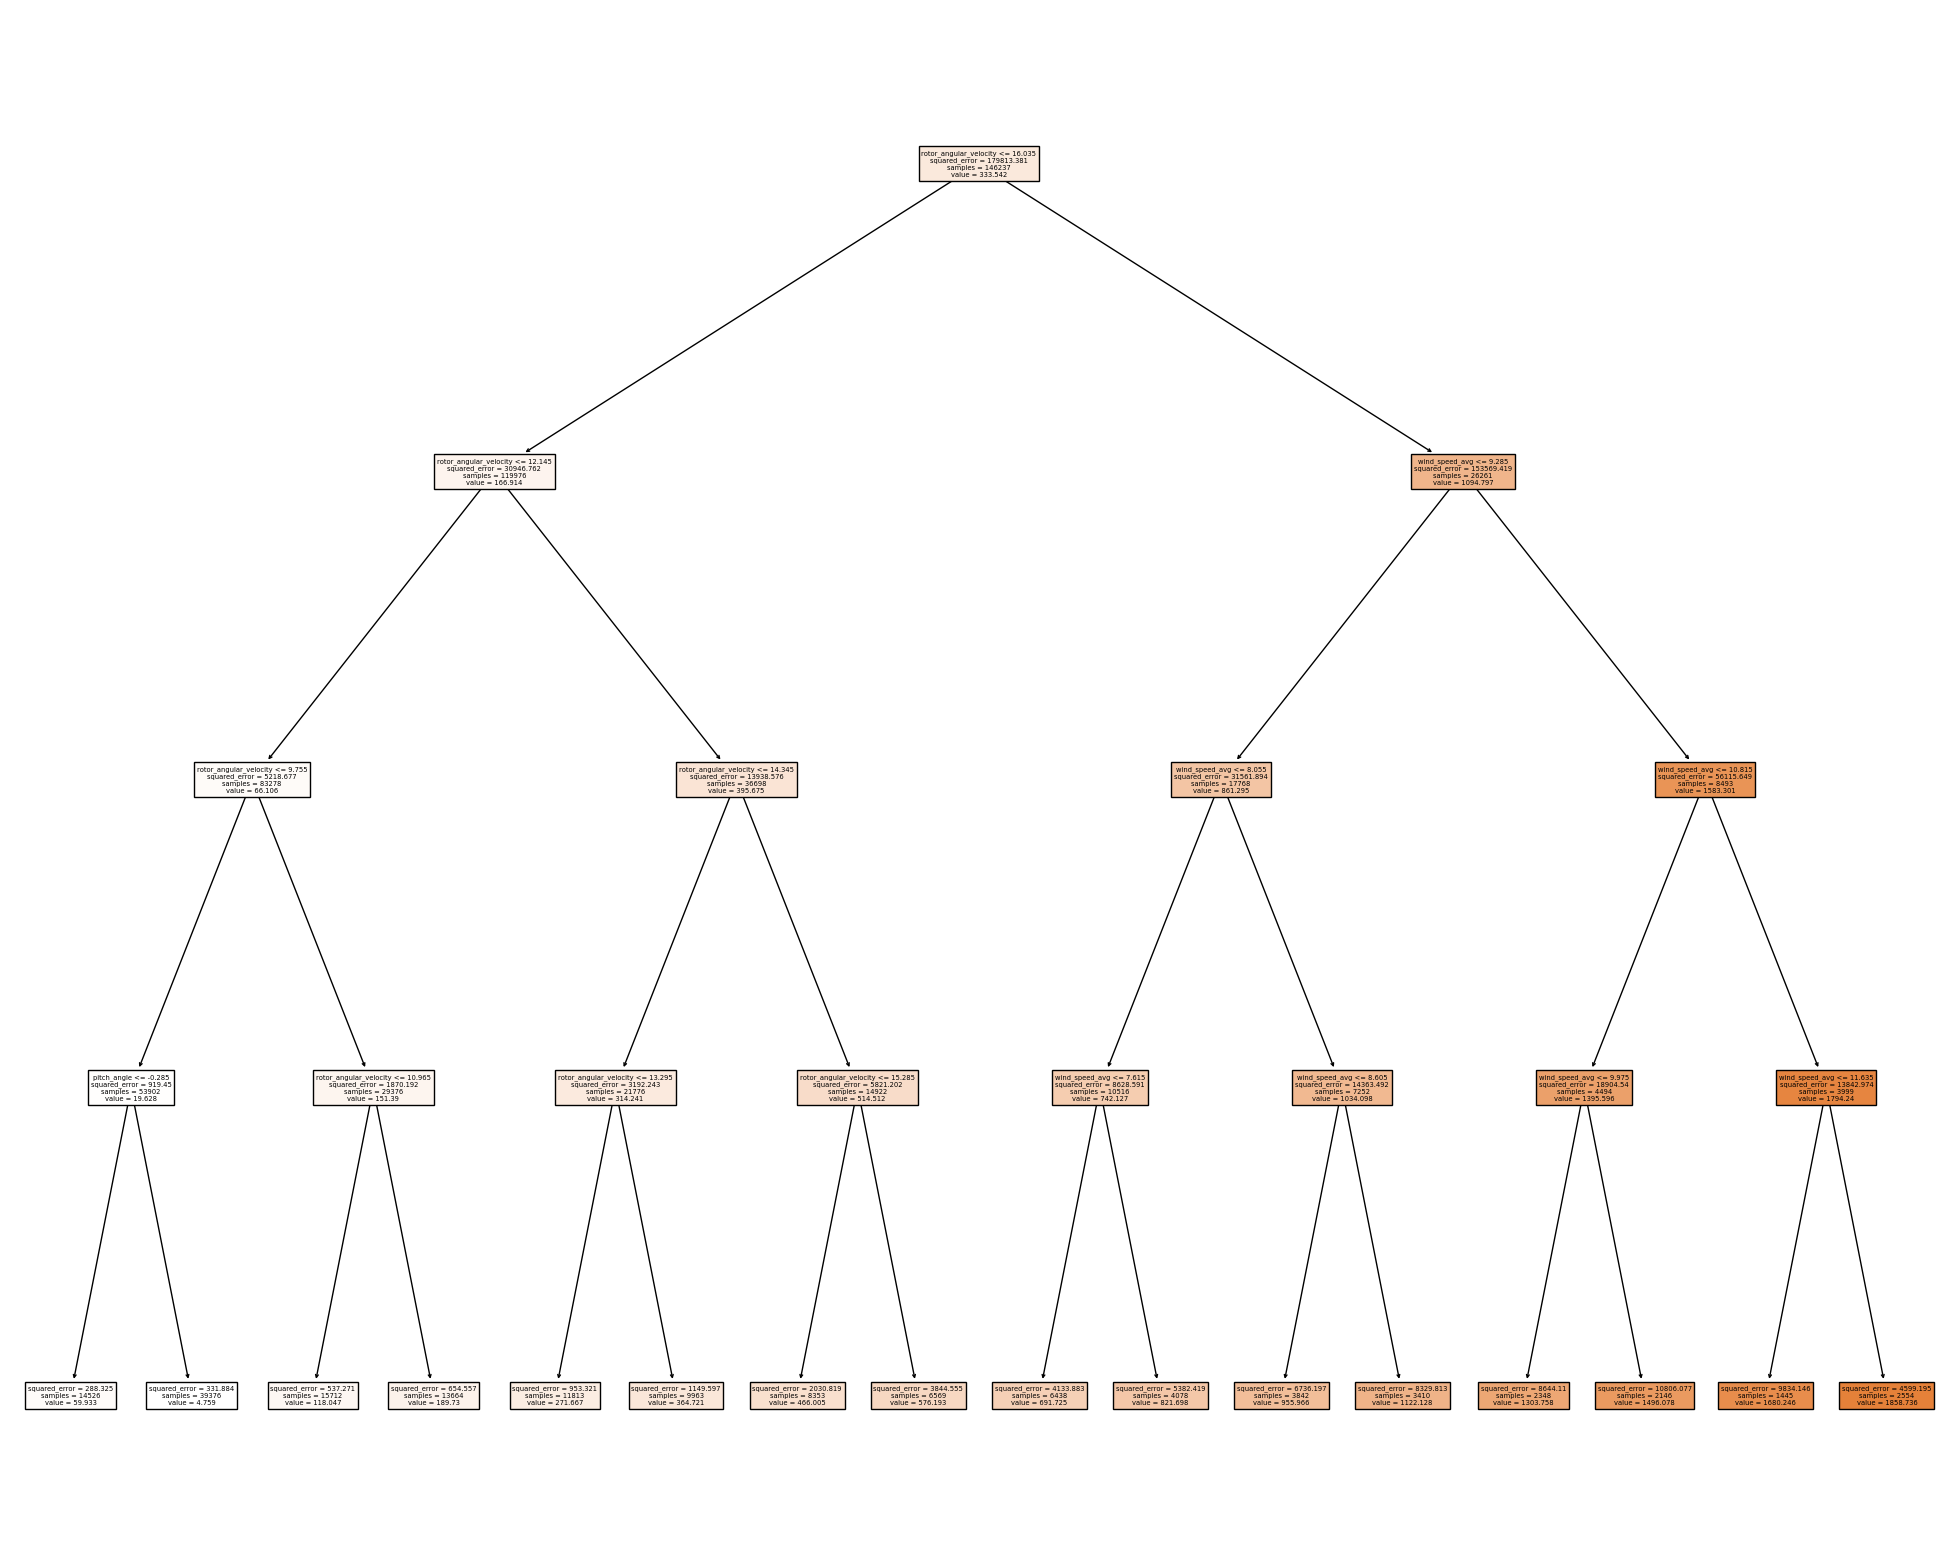

In [ ]:
wind_regression_tree_fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(wind_regression_tree, feature_names=train_X.columns, filled=True)

**Observation** : The rotor_angular_velocity and wind_speed_avg are the driving factors for the active_power prediction.

Actual value vs Predicted value

In [ ]:
wind_lr_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_lr_dif.head()

,Actual value,Predicted value
171193,307.26001,271.667275
45211,115.76000,118.047039
29762,496.62000,466.005410
32377,-0.03000,4.758685
124659,122.06000,118.047039


Metrics

In [ ]:
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_regression_tree.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 98.96
Mean Absolute Error: 26.19673058698419
Mean Square Error: 1870.5520473861532
Root Mean Square Error: 43.24987916036475


Observation : The metrics are better than the metrics from the linear regression model. The R squared values have increased and the Error figures have decreased. So Decision tree is a better model for our predictions for active_power.

Prediction on the test set

In [ ]:
#Prediction of test set
#Reading test data file
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')
#Taking only a subset of columns for test data in the dataframe
test_data_X = test_data[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
#Predicting the actual_power for the test data set
y_test_data_predict = wind_regression_tree_lr.predict(test_data_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_test_data_predict))

Prediction of test set: [4.7586855 4.7586855 4.7586855 ... 4.7586855 4.7586855 4.7586855]


Creation of submission dataset

In [ ]:
submission_MX = pd.DataFrame(data=y_test_data_predict, columns=["active_power"])
submission_MX.reset_index(inplace=True)
submission_MX = submission_MX.rename(columns = {'index':'id'})
submission_MX.head()

,id,active_power
0,0,4.758685
1,1,4.758685
2,2,4.758685
3,3,4.758685
4,4,4.758685
